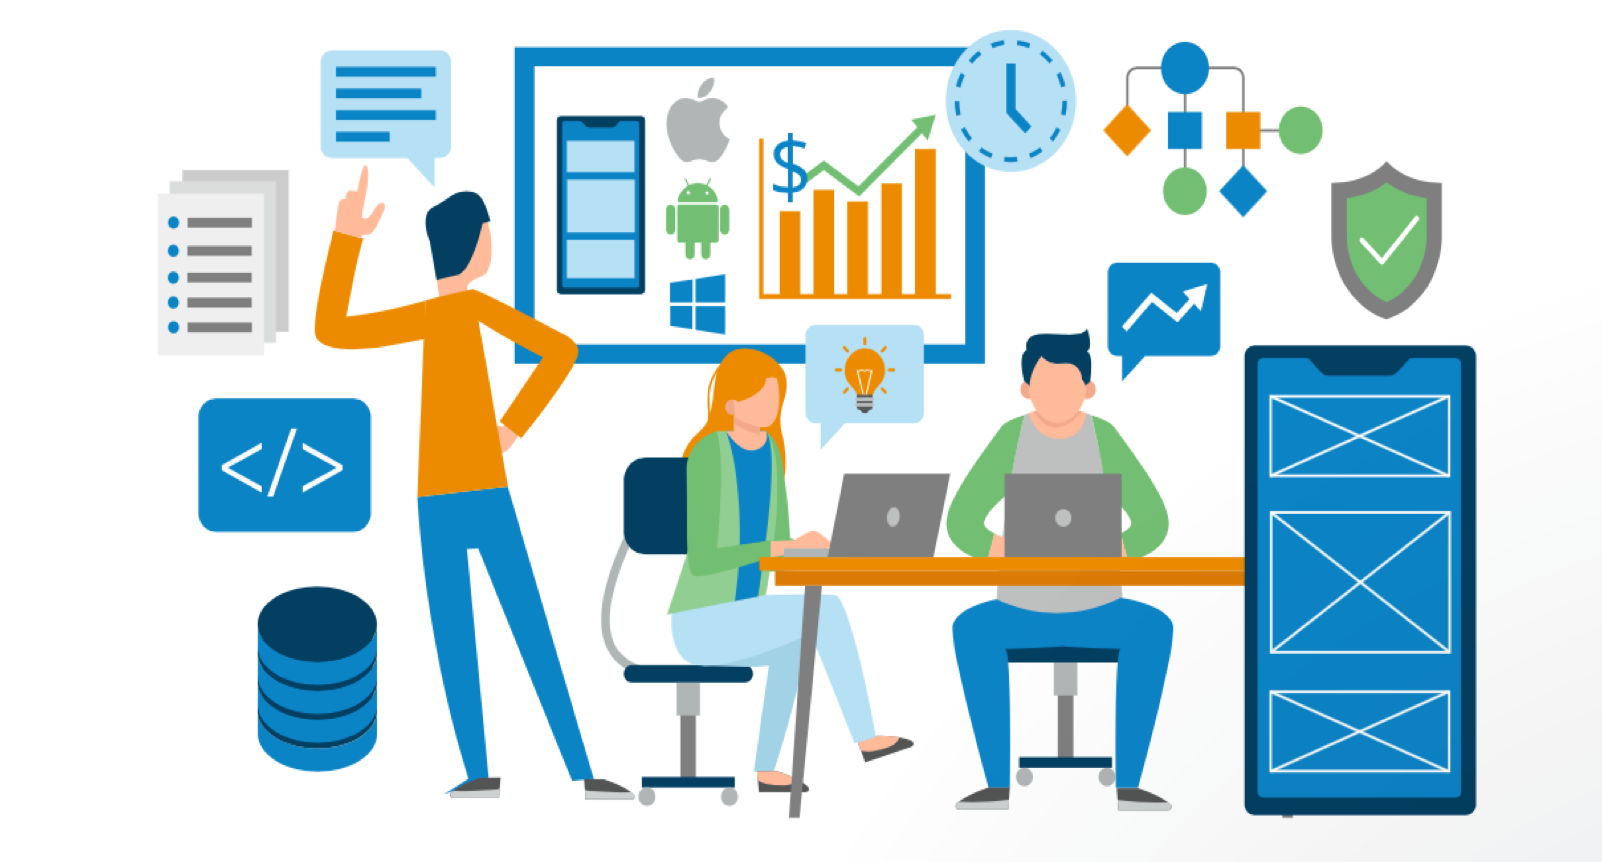

pic credit - google images

# Dataset Acknowledgement



Amidst the pandemic many people lost their jobs, with this dataset it is possible to hone the job search so that more people in need can find employment.This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions, with features such as:

* Salary Estimate
* Location
* Company Rating
* Job Description
* and more.



# We will Perform EDA on following questions


* What is Min and Max Salary Distribution of Data Analyst
* Which type of Industry have High Revenue
* Which type of sector have best Salary and Rating
* Which type of Sector have Good Average Rating
* Which Sector have Highest Average Revenue
* Which location(city) have highest Data Analyst or does it's play any important role in Job
* For which Job Role People mostly apply
* For which Stream(Domain) People mostly apply
* For which Industry People mostly apply
* Which Sector is leading in Data Analyst
* Which Company have most Data Analyst
* Which type of OwnerShip do company have
* Which city have highest Data Analyst

# Importing Libraries and Reading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as px
import re

from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [ ]:
data = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')
data.drop("Unnamed: 0",1,inplace = True)

In [ ]:
data.shape

**Reading Top Ten Data from dataset**

In [ ]:
data.head(10)

**Reading Last Ten Data from dataset**

In [ ]:
data.tail(10)

Checking Datatype and Not Null Values in Dataset

In [ ]:
data.info()

# DATA CLEANSING

> Info method shows that there are no null value but if we observe the dataset heading and tail we will come to know that instead of null value they have put -1 

**so lets do one thing we will replace -1 with np.nan so we can calculate the missing values in dataset for better observation**

In [ ]:
data.replace(to_replace =-1 , value=np.nan,inplace=True)
data.replace(to_replace ='-1' , value=np.nan,inplace=True)
data.replace(to_replace =-1.0 , value=np.nan,inplace=True)

In [ ]:
def FindingMissingValues(dataFrame):
    for col in dataFrame.columns:
        print('{0:.2f}% or {1} values are Missing in {2} Column'.format(dataFrame[col].isna().sum()/len(dataFrame)*100,dataFrame[col].isna().sum(),col),end='\n\n')

FindingMissingValues(data)

**96.45% or 2173 values are Missing in Easy Apply Column** 

**76.88% or 1732 values are Missing in Competitors Column**

There are more than 50% values are missing in these 2 Column 

so we will simply drop the Column becaue there are not enough data to do Forward,Backward, Mean, Median , Mode or Imputer Fill

In [ ]:
data.drop(['Easy Apply','Competitors'],1,inplace = True)

In Job Title Column We can point one thing that **Job Role** is been define before "," and **Domain** or **Branch** for Job is Define after ","

So we simply split these in two different columns namely **Job Domain** and **Job Role**

In [ ]:
data['Job Domain'] = data['Job Title'].apply(lambda x: re.search(r',.*',x).group().replace(',','') if(bool(re.search(r',.*',x))) else x )
data['Job Role'] = data['Job Title'].apply(lambda x: re.search(r'.*,',x).group().replace(',','') if(bool(re.search(r',.*',x))) else x )

Salary Estimate have salary range **Min to Max**

we will divide this column into two columns one will be  ***Min Salary*** and another will be ***Max Salary***
and also convert the data type from object to  into float64

where K = 1000Dollors   (for this dataset $) so we will simply mutiply 1000 where salary is listed with "K" for simple Calculation


In [ ]:

data['Min Salary'] = 0
data['Max Salary'] = 0

for x in range(len(data)):
    
    if(type(data.iloc[x,1])==float):
        data.iloc[x,15] = np.nan
        data.iloc[x,16] = np.nan
    else:
        cleanSal = data.iloc[x,1].replace('(Glassdoor est.)','').strip().split('-')
    
    if('K' in cleanSal[0]):
        data.iloc[x,15] = float(cleanSal[0].replace('$','').replace('K',''))*1000
    
        
    if('K' in cleanSal[1]):
        data.iloc[x,16]= float(cleanSal[1].replace('$','').replace('K',''))*1000
    

Job Description Column have huge amount of text data which is not required for this EDA so we will drop this column ***(But we will use this in next Version)***

And we also know that If a Person is Appointed as Data Analyst or for any Job Role then he or she must have great idea about that role 

In [ ]:
data.drop('Job Description',1,inplace=True)

In Company Column we can see that data have ***\n3.8*** as suffix where 3.8 is rating of company and we will eliminate this and only keep the Company name in that column because we already have a seprate Rating Column

In [ ]:
data['Company Name'] = data['Company Name'].apply(lambda x: re.sub(r'\n.*','',str(x)))

In Employees Column

It show the range of employe, so we will only keep max number of emp for better EDA in  new column MaxEmpSize

In [ ]:

data['MaxEmpSize'] = 0

for x in range(len(data)):
    emp = data.iloc[x,6]
    
    try:
        if(type(emp)==float or emp == 'Unknown'): #type(np.nan)== float
            data.iloc[x,16] =  np.nan
        elif('+' in emp):
            data.iloc[x,16] = float(emp.replace('+','').replace('employees','').strip())
        elif('employees' in emp):
            data.iloc[x,16] = float(emp.replace('employees','').strip().split('to')[1])
    except(Exception)as e:
        print(e,emp)


In Revenue Col it's provide revenue in range and also in two different Unit Millions and Billions

Where if 500M we will replace it as  500000000 and for 5 Billion 5000000000

and also we will take only the max Revenue in Max Revenue Col


In [ ]:

data['MaxRevenue'] = 0

for x in range(len(data)):
    rev = data.iloc[x,11]
    
    if(rev == 'Unknown / Non-Applicable' or type(rev)==float):
        data.iloc[x,17] = np.nan
    elif(('million' in rev) and ('billion' not in rev)):
        maxRev = rev.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            data.iloc[x,17] = float(maxRev[0].replace('Less than','').strip())*100000000
        else:
            if(len(maxRev)==2):
                data.iloc[x,17] = float(maxRev[1])*100000000
            elif(len(maxRev)<2):
                data.iloc[x,17] = float(maxRev[0])*100000000
    elif(('billion'in rev)):
        maxRev = rev.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            data.iloc[x,17] = float(maxRev[0].replace('+','').strip())*1000000000
        else:
            if(len(maxRev)==2):
                data.iloc[x,17] = float(maxRev[1])*1000000000
            elif(len(maxRev)<2):
                data.iloc[x,17] = float(maxRev[0])*1000000000
        

We have Successfully cleaned the data now we can remove some column 

* Job Title
* Salary Estimate
* Size
* Revenue

because we have successfully extracted usefull data

In [ ]:
data.drop(['Job Title','Salary Estimate','Size','Revenue'],1,inplace = True)
data.head(10)

# Visualization Part

In [ ]:
data.describe().transpose()

In [ ]:
data.describe(include='object').transpose()

# What is Min and Max Salary Distribution of Data Analyst


In [ ]:
dataAnalyst = data[data['Job Role']=='Data Analyst']

fig = go.Figure()

fig.add_trace(go.Box(y=dataAnalyst['Min Salary'],name='Min Salary',boxmean='sd'))
fig.add_trace(go.Box(y=dataAnalyst['Max Salary'],name='Max Salary',boxmean='sd'))

fig.update_layout(title='Minimum and Maximum Salary of Data Analyst',height=800)

fig.show()

# Which type of Industry have high Revenue 

In [ ]:
industry = data.groupby(['Industry'])['MaxRevenue'].mean()
fig = go.Figure()

fig.add_trace(go.Scatter(x=industry.index,y=industry,mode='lines+markers',marker = dict(color = 'rgba(255,0, 0, 1.0)',size=12)))

fig.show()

**Industry Type Which have Mean Revenue Greater than 20Billion**

In [ ]:
industry = industry[industry>20000000000]

fig = go.Figure()

fig.add_trace(go.Scatter(x=industry.index,y=industry,mode='lines+markers',marker=dict(color='rgba(255,0,0,1.0)',size=12)))

fig.update_layout(title='Industry Type Which have Mean Revenue Greater than 20Billion',
                 yaxis=dict(title='Billion Dollars'),
                  xaxis=dict(title='Industry Type')
                 )

fig.show()

# Which type of sector have best Salary and Rating

In [ ]:
sector = data.groupby(['Sector']).mean()

fig = go.Figure()

fig.add_trace(go.Bar(x=sector.index,y=sector['Min Salary'],name='Mininum Mean Salary',text=sector['Min Salary'],textposition='auto' ))
fig.add_trace(go.Bar(x=sector.index,y=sector['Max Salary'],name='Maximum Mean Salary',text=sector['Min Salary'],textposition='auto'))

fig.update_layout(title='Mean Salary',barmode='stack')

fig.show()

# Which type of Sector have Good Average Rating

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=sector.index,y=sector['Rating'],name='Rating',text=sector['Rating'],
                         mode='markers',
                         marker=dict(size=sector['Rating']*8,color=sector['Rating'])
                        ))

fig.update_layout(title='Sectors with Average Rating',
                 xaxis=dict(title='Sectors'),
                 yaxis=dict(title='Average Rating'))

fig.show()

# Which Sector have Highest Average Revenue

In [ ]:
fig = go.Figure()

sector.dropna(inplace=True)
fig.add_trace(go.Scatter(x=sector.index,y=sector['MaxRevenue'],name='MaxRevenue',text=sector['Rating'],
                         mode='markers',
                         marker=dict(size=sector['MaxRevenue']**0.15,color=sector['MaxRevenue'])
                        ))

fig.update_layout(title='Sector with Average Revenue',
                 xaxis=dict(title='Sectors'),
                 yaxis=dict(title='Average MaxRevenue'))

fig.show()

# Which location(city) have highest Data Analyst or does it's play any important role in Job 

In [ ]:
data2 = data.dropna()
fig = px.sunburst(data2, path=['Sector','Location','Job Role'], values='Min Salary',height=800)
fig.update_layout(title='Sector -> Location -> JobRole -> Min Salary')
fig.show()

# For which Job Role People mostly apply

In [ ]:
from wordcloud import WordCloud

def WordCloudMaking(data,col):
    invester = data[col][~pd.isnull(data[col])]

    wordCloud = WordCloud(width=500,height= 300).generate(' '.join(invester))

    plt.figure(figsize=(19,9))

    plt.axis('off')
    plt.title(data[col].name,fontsize=20)
    plt.imshow(wordCloud)
    plt.show()
WordCloudMaking(data,'Job Role')

# For which Stream(Domain) People mostly apply

In [ ]:
WordCloudMaking(data,'Job Domain')

# For which Industry People mostly apply

In [ ]:
WordCloudMaking(data,'Industry')

# Which Sector is leading in Data Analyst

In [ ]:
WordCloudMaking(data,'Sector')

# Which Company have most Data Analyst

In [ ]:
WordCloudMaking(data,'Company Name')

# Which type of OwnerShip do company have

In [ ]:
WordCloudMaking(data,'Type of ownership')

# Which city have highest Data Analyst

In [ ]:
location = data[data['Job Role']=='Data Analyst']['Location'].value_counts()
fig = px.pie(location,names=location.index,values=location,height=800)
fig.update_traces(textposition='inside',textinfo='label+percent',hole=.4)

fig.update_layout(annotations=[dict(text='Locations with Maximum Data Analyst',showarrow=False)])

fig.show()

**If you guys have any suggestion(s) please comment down below it will help me to improve my skill**